In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer

In [5]:
X,y = make_moons(n_samples = 100, noise = 0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify= y,random_state =42)
forest = RandomForestClassifier(n_estimators = 5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

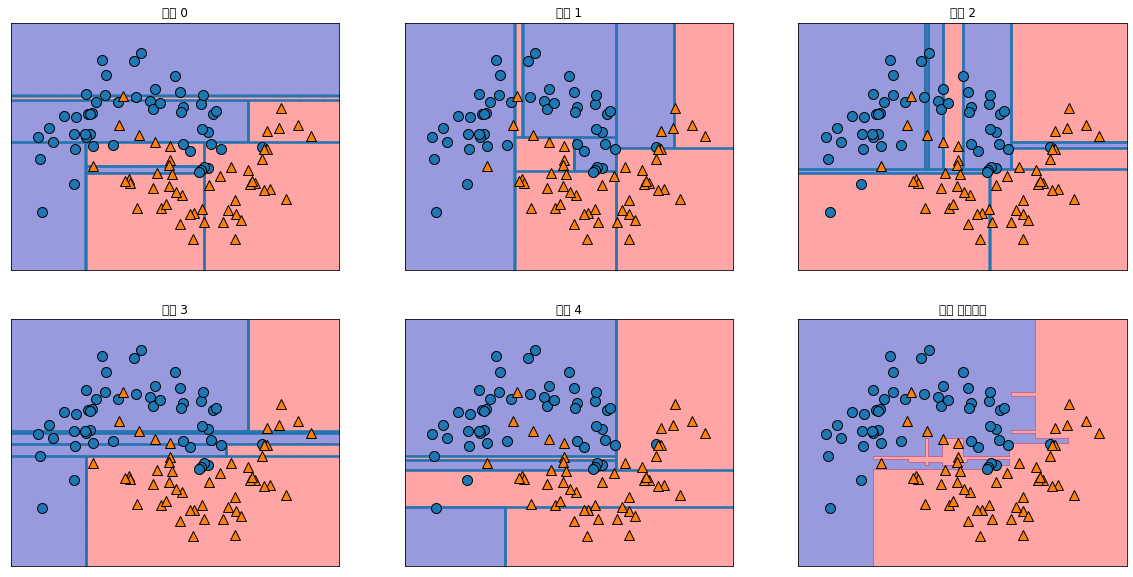

In [12]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax = axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [15]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.972


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

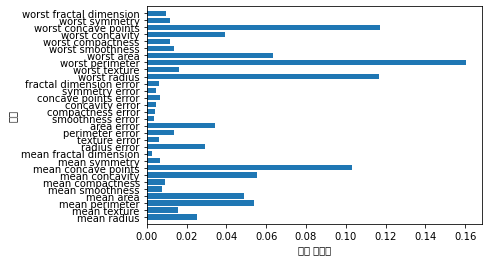

In [17]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(forest)

# 그레이디언트 부스팅 회귀 트리

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수: 1.000
테스트 세트 점수: 0.965


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수: 0.991
테스트 세트 점수: 0.972


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state =0)
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate =0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수: 0.988
테스트 세트 점수: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

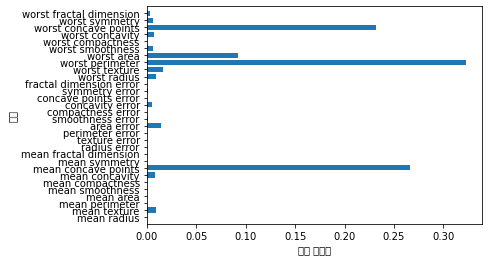

In [9]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train, y_train)

import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(gbrt)